 ### Neste projeto, vamos trabalhar com o conjunto de dados COVID19, publicado pela John Hopkins University, que consiste nos dados relativos ao número acumulado de casos confirmados, por dia, em cada país. Além disso, temos outro conjunto de dados composto por vários fatores de vida, avaliados pelas pessoas que vivem em cada país ao redor do globo. Vamos mesclar esses dois conjuntos de dados para ver se há alguma relação entre a propagação do vírus em um país e o quão feliz as pessoas são, vivendo naquele país.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Modules are imported


In [2]:
corona_csv = pd.read_csv('time_series_covid19_confirmed_global.csv', sep=',')

In [3]:
corona_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,31577,32785,34159,35552,37510,39570,41204,42785,44931,47203
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,16667,17064,17489,18033,18698,19157,19708,20268,20588,21006
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3131,3134,3135,3137,3143,3144,3149,3151,3150,3159


In [4]:
corona_csv.shape

(266, 158)

In [5]:
corona_csv.drop(["Lat",'Long'], axis=1, inplace=True)
corona_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
4,NaN,Angola,0,0,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,31577,32785,34159,35552,37510,39570,41204,42785,44931,47203
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,16667,17064,17489,18033,18698,19157,19708,20268,20588,21006
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,3131,3134,3135,3137,3143,3144,3149,3151,3150,3159


In [6]:
corona_csv_agg = corona_csv.groupby("Country/Region").sum()
corona_csv_agg.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
Albania,0,0,0,0,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
Algeria,0,0,0,0,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
Andorra,0,0,0,0,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
Angola,0,0,0,0,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
Argentina,0,0,0,0,0,0,0,0,0,0,...,31577,32785,34159,35552,37510,39570,41204,42785,44931,47203
Armenia,0,0,0,0,0,0,0,0,0,0,...,16667,17064,17489,18033,18698,19157,19708,20268,20588,21006
Australia,0,0,0,0,4,5,5,6,9,9,...,7335,7347,7370,7391,7409,7411,7461,7474,7492,7521


In [7]:
corona_csv_agg.shape

(188, 154)

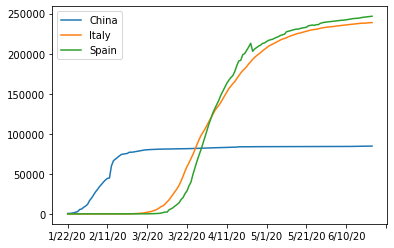

In [8]:
corona_csv_agg.loc['China'].plot()
corona_csv_agg.loc['Italy'].plot()
corona_csv_agg.loc['Spain'].plot()
plt.legend()

### Task3: Calculating a good measure

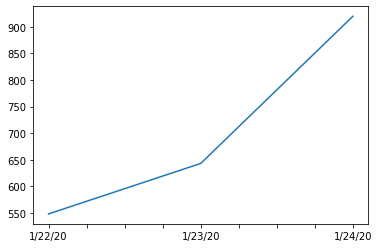

In [9]:
corona_csv_agg.loc['China'][:3].plot()

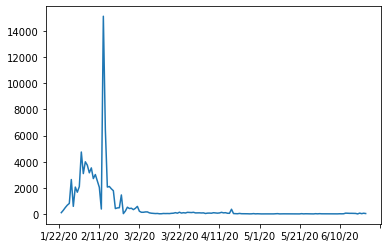

In [10]:
corona_csv_agg.loc['China'].diff().plot()

In [11]:
corona_csv_agg.loc['China'].diff().max()

15136.0

In [12]:
corona_csv_agg.loc['Italy'].diff().max()

6557.0

In [13]:
corona_csv_agg.loc['Spain'].diff().max()

9630.0

In [14]:
countries = list(corona_csv_agg.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_csv_agg.loc[c].diff().max())
corona_csv_agg["max_infection_rates"] =  max_infection_rates

In [15]:
corona_csv_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,25527,26310,26874,27532,27878,28424,28833,29157,29481,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,1590,1672,1722,1788,1838,1891,1962,1995,2047,82.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,11031,11147,11268,11385,11504,11631,11771,11920,12076,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,853,854,854,855,855,855,855,855,855,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,142,148,155,166,172,176,183,186,189,17.0


In [16]:
corona_data = pd.DataFrame(corona_csv_agg['max_infection_rates'])
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,915.0
Albania,82.0
Algeria,199.0
Andorra,79.0
Angola,17.0


### Task4: Import and preparing world hapinesse report

In [17]:
hapiness_report_csv = pd.read_csv('world_hapiness_report.csv')
hapiness_report_csv.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [18]:
useless_cols = ['Overall rank','Generosity','Perceptions of corruption']

In [19]:
hapiness_report_csv.drop(useless_cols, axis=1, inplace=True)
hapiness_report_csv.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557


In [20]:
hapiness_report_csv.set_index('Country or region', inplace=True)

In [21]:
hapiness_report_csv.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


In [22]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,915.0
Albania,82.0
Algeria,199.0
Andorra,79.0
Angola,17.0


In [23]:
corona_data.shape

(188, 1)

In [24]:
hapiness_report_csv.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


In [25]:
hapiness_report_csv.shape

(156, 5)

In [26]:
data = corona_data.join(hapiness_report_csv, how='inner')
data.head()

,max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,3.203,0.350,0.517,0.361,0.000
Albania,82.0,4.719,0.947,0.848,0.874,0.383
Algeria,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,2272.0,6.086,1.092,1.432,0.881,0.471
Armenia,766.0,4.559,0.850,1.055,0.815,0.283


In [27]:
data.corr()

,max_infection_rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.181182,0.163797,0.128499,0.170837,0.044830
Score,0.181182,1.000000,0.795413,0.784094,0.801891,0.585119
GDP per capita,0.163797,0.795413,1.000000,0.757521,0.859431,0.394799
Social support,0.128499,0.784094,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.170837,0.801891,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.044830,0.585119,0.394799,0.456317,0.423146,1.000000


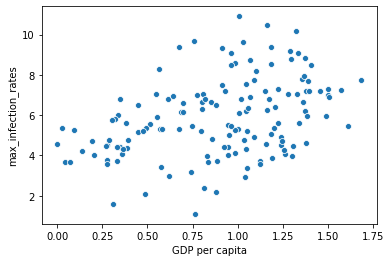

In [28]:
x = data['GDP per capita']
y = data['max_infection_rates']
sns.scatterplot(x,np.log(y))

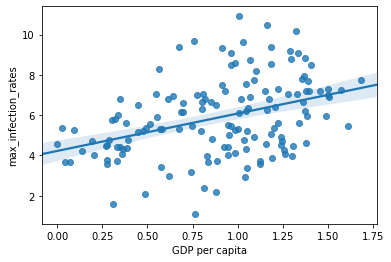

In [29]:
sns.regplot(x, np.log(y))

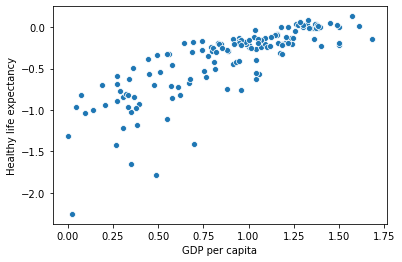

In [30]:
x = data['GDP per capita']
y = data['Healthy life expectancy']
sns.scatterplot(x,np.log(y))

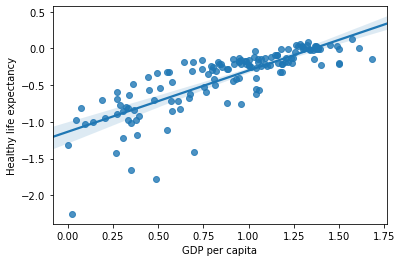

In [31]:
sns.regplot(x, np.log(y))

### Conclusão: Podemos dizer que, praticamente, não há correlação entre a propagação do vírus em um país e o quão feliz as pessoas são, vivendo naquele país.

### Referências:

### Covid-19 Data Analysis Using Python. Coursera.